In [1]:
import pandas as pd
import numpy as np

from scipy.stats import pearsonr
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)

#### read csv files from kaggle 

In [3]:
df_gemini_price_d = pd.read_csv('datasets/kaggle/BTCUSD_day.csv')
df_gemini_price_1h = pd.read_csv('datasets/kaggle/BTCUSD_1hr.csv')

#### convert columns to datetime

In [4]:
df_gemini_price_d['Date'] = pd.to_datetime(df_gemini_price_d['Date'])
df_gemini_price_1h['Date'] = pd.to_datetime(df_gemini_price_1h['Date'])

#### verify the range of datetime in dataframes

In [5]:
print('------------', 'df_gemini_price_d', '------------')
print(df_gemini_price_d['Date'].max())
print(df_gemini_price_d['Date'].min())
print('------------', 'df_gemini_price_1h', '------------')
print(df_gemini_price_1h['Date'].max())
print(df_gemini_price_1h['Date'].min())

------------ df_gemini_price_d ------------
2020-04-09 00:00:00
2015-10-08 00:00:00
------------ df_gemini_price_1h ------------
2020-04-09 00:00:00
2015-10-08 13:00:00


#### verify the numbers of lines in dataframes

In [6]:
print('------------', 'df_coinmarket_price_d', '------------')
print(df_gemini_price_d.shape[0])
print('------------', 'df_coinmarket_price_1h', '------------')
print(df_gemini_price_1h.shape[0])

------------ df_coinmarket_price_d ------------
1646
------------ df_coinmarket_price_1h ------------
39468


In [15]:
class NaiveForecast(object):
    
    def __init__(self, df, percentage_train_size, periodicity):
        
        self.df = df
        self.percentage_train_size = percentage_train_size
        self.periodicity = periodicity
                
    def perform(self):
        
        train_size = int(len(self.df) * self.percentage_train_size)
        self.df[:train_size]
        
        array_pred = np.array([])
        
        date_test = self.df[train_size:].index
        count = 0
        
        for current_datetime in date_test:

            pred = self.prediction(current_datetime = current_datetime)
            array_pred = np.append(array_pred, pred)
            print('---')
            print('current_datetime', current_datetime)
            print('pred', pred)
#             count += 1
#             print(count/len(date_test)*100)
        
        date_train = self.df[:train_size].index
        y_train = self.df[:train_size]['Close'].values
        
        y_test = self.df[train_size:]['Close'].values
        
        data_train = {
          'date_train': date_train,
          'y_train': y_train,
#           'y_train_predict': y_train_predict
        }

        data_test = {
            'date_test': date_test,
            'y_test': y_test,
            'y_test_predict': array_pred
        }

        df_train = pd.DataFrame(data_train)
        df_test = pd.DataFrame(data_test)

        mae, mape, mse, rmse, rmspe, r2, pearson = self.perform_metrics(df_test['y_test'],
                                                                        df_test['y_test_predict'])
        print('mae', mae,
              'mape', mape,
              'mse', mse,
              'rmse', rmse,
              'rmspe', rmspe,
              'r2', r2,
              'pearson', pearson)

        
        return df_train, df_test
       
    def prediction(self, current_datetime):
        
        if self.periodicity == '1_day':
            last_datetime = (current_datetime - pd.Timedelta(days = 1))
            
        if self.periodicity == '1_hour':
            last_datetime = (current_datetime - pd.Timedelta(hours = 1))
            
        pred = self.df[last_datetime:last_datetime]['Close'].values[0]
        
        return pred
        
    def perform_metrics(self, y_truth, y_forecasted): 

        mae = round(mean_absolute_error(y_truth, y_forecasted) ,4)
        mape = round(np.mean(np.abs((y_truth - y_forecasted) / y_truth)) * 100, 4)
        mse = round(mean_squared_error(y_truth, y_forecasted), 4)
        rmse = round(mse**(0.5), 4)
        rmspe = round((np.sqrt(np.mean(np.square((y_truth - y_forecasted) / y_truth)))) * 100, 4)
        r2 = round(r2_score(y_truth, y_forecasted), 4)
        try:
            corr, _ = pearsonr(y_truth, y_forecasted)
            pearson = round(corr, 4)
        except:
            pearson = None

        return mae, mape, mse, rmse, rmspe, r2, pearson
    

In [23]:
### MAIN

# df = df_gemini_price_d.copy()
df = df_gemini_price_1h.copy()

df = df.set_index('Date')
df = df.sort_values(by = ['Date'])
df = df.loc[:, ['Close']]

df = df.asfreq('H') # D or H

naive_forecast = NaiveForecast(df = df,
                               percentage_train_size = 0.80,
                               periodicity = '1_hour')
df_train, df_test = naive_forecast.perform()

---
current_datetime 2019-05-16 03:00:00
pred 8320.01
---
current_datetime 2019-05-16 04:00:00
pred 8247.34
---
current_datetime 2019-05-16 05:00:00
pred 7983.68
---
current_datetime 2019-05-16 06:00:00
pred 7994.15
---
current_datetime 2019-05-16 07:00:00
pred 8126.34
---
current_datetime 2019-05-16 08:00:00
pred 8010.72
---
current_datetime 2019-05-16 09:00:00
pred 7977.07
---
current_datetime 2019-05-16 10:00:00
pred 7960.58
---
current_datetime 2019-05-16 11:00:00
pred 7862.73
---
current_datetime 2019-05-16 12:00:00
pred 7870.69
---
current_datetime 2019-05-16 13:00:00
pred 7799.72
---
current_datetime 2019-05-16 14:00:00
pred 7859.99
---
current_datetime 2019-05-16 15:00:00
pred 7953.24
---
current_datetime 2019-05-16 16:00:00
pred 8024.22
---
current_datetime 2019-05-16 17:00:00
pred 7921.76
---
current_datetime 2019-05-16 18:00:00
pred 7919.76
---
current_datetime 2019-05-16 19:00:00
pred 7907.78
---
current_datetime 2019-05-16 20:00:00
pred 7838.36
---
current_datetime 2019-05

---
current_datetime 2019-05-26 19:00:00
pred 8027.22
---
current_datetime 2019-05-26 20:00:00
pred 8554.05
---
current_datetime 2019-05-26 21:00:00
pred 8600.49
---
current_datetime 2019-05-26 22:00:00
pred 8654.41
---
current_datetime 2019-05-26 23:00:00
pred 8656.11
---
current_datetime 2019-05-27 00:00:00
pred 8750.01
---
current_datetime 2019-05-27 01:00:00
pred 8898.78
---
current_datetime 2019-05-27 02:00:00
pred 8834.99
---
current_datetime 2019-05-27 03:00:00
pred 8750.0
---
current_datetime 2019-05-27 04:00:00
pred 8777.03
---
current_datetime 2019-05-27 05:00:00
pred 8732.99
---
current_datetime 2019-05-27 06:00:00
pred 8743.35
---
current_datetime 2019-05-27 07:00:00
pred 8758.19
---
current_datetime 2019-05-27 08:00:00
pred 8784.62
---
current_datetime 2019-05-27 09:00:00
pred 8734.21
---
current_datetime 2019-05-27 10:00:00
pred 8760.22
---
current_datetime 2019-05-27 11:00:00
pred 8756.65
---
current_datetime 2019-05-27 12:00:00
pred 8719.43
---
current_datetime 2019-05-

---
current_datetime 2019-06-05 22:00:00
pred 7736.15
---
current_datetime 2019-06-05 23:00:00
pred 7789.53
---
current_datetime 2019-06-06 00:00:00
pred 7791.42
---
current_datetime 2019-06-06 01:00:00
pred 7797.95
---
current_datetime 2019-06-06 02:00:00
pred 7840.12
---
current_datetime 2019-06-06 03:00:00
pred 7818.8
---
current_datetime 2019-06-06 04:00:00
pred 7864.04
---
current_datetime 2019-06-06 05:00:00
pred 7836.28
---
current_datetime 2019-06-06 06:00:00
pred 7792.66
---
current_datetime 2019-06-06 07:00:00
pred 7819.99
---
current_datetime 2019-06-06 08:00:00
pred 7769.05
---
current_datetime 2019-06-06 09:00:00
pred 7810.7
---
current_datetime 2019-06-06 10:00:00
pred 7780.47
---
current_datetime 2019-06-06 11:00:00
pred 7810.7
---
current_datetime 2019-06-06 12:00:00
pred 7852.77
---
current_datetime 2019-06-06 13:00:00
pred 7766.78
---
current_datetime 2019-06-06 14:00:00
pred 7739.65
---
current_datetime 2019-06-06 15:00:00
pred 7696.01
---
current_datetime 2019-06-06

---
current_datetime 2019-06-17 13:00:00
pred 9297.1
---
current_datetime 2019-06-17 14:00:00
pred 9292.38
---
current_datetime 2019-06-17 15:00:00
pred 9405.23
---
current_datetime 2019-06-17 16:00:00
pred 9187.84
---
current_datetime 2019-06-17 17:00:00
pred 9223.42
---
current_datetime 2019-06-17 18:00:00
pred 9255.98
---
current_datetime 2019-06-17 19:00:00
pred 9280.88
---
current_datetime 2019-06-17 20:00:00
pred 9307.2
---
current_datetime 2019-06-17 21:00:00
pred 9275.55
---
current_datetime 2019-06-17 22:00:00
pred 9293.84
---
current_datetime 2019-06-17 23:00:00
pred 9353.53
---
current_datetime 2019-06-18 00:00:00
pred 9331.03
---
current_datetime 2019-06-18 01:00:00
pred 9303.74
---
current_datetime 2019-06-18 02:00:00
pred 9301.81
---
current_datetime 2019-06-18 03:00:00
pred 9261.2
---
current_datetime 2019-06-18 04:00:00
pred 9270.94
---
current_datetime 2019-06-18 05:00:00
pred 9266.21
---
current_datetime 2019-06-18 06:00:00
pred 9157.61
---
current_datetime 2019-06-18

---
current_datetime 2019-06-28 04:00:00
pred 11107.27
---
current_datetime 2019-06-28 05:00:00
pred 11026.26
---
current_datetime 2019-06-28 06:00:00
pred 11096.54
---
current_datetime 2019-06-28 07:00:00
pred 11329.37
---
current_datetime 2019-06-28 08:00:00
pred 11262.13
---
current_datetime 2019-06-28 09:00:00
pred 11660.64
---
current_datetime 2019-06-28 10:00:00
pred 11876.27
---
current_datetime 2019-06-28 11:00:00
pred 11851.98
---
current_datetime 2019-06-28 12:00:00
pred 12082.03
---
current_datetime 2019-06-28 13:00:00
pred 11642.34
---
current_datetime 2019-06-28 14:00:00
pred 11871.3
---
current_datetime 2019-06-28 15:00:00
pred 11705.05
---
current_datetime 2019-06-28 16:00:00
pred 11899.96
---
current_datetime 2019-06-28 17:00:00
pred 11902.07
---
current_datetime 2019-06-28 18:00:00
pred 11825.95
---
current_datetime 2019-06-28 19:00:00
pred 11920.48
---
current_datetime 2019-06-28 20:00:00
pred 12330.95
---
current_datetime 2019-06-28 21:00:00
pred 12212.84
---
current

---
current_datetime 2019-07-09 10:00:00
pred 12680.0
---
current_datetime 2019-07-09 11:00:00
pred 12300.57
---
current_datetime 2019-07-09 12:00:00
pred 12301.76
---
current_datetime 2019-07-09 13:00:00
pred 12387.62
---
current_datetime 2019-07-09 14:00:00
pred 12409.92
---
current_datetime 2019-07-09 15:00:00
pred 12333.36
---
current_datetime 2019-07-09 16:00:00
pred 12403.31
---
current_datetime 2019-07-09 17:00:00
pred 12558.1
---
current_datetime 2019-07-09 18:00:00
pred 12550.0
---
current_datetime 2019-07-09 19:00:00
pred 12611.8
---
current_datetime 2019-07-09 20:00:00
pred 12514.29
---
current_datetime 2019-07-09 21:00:00
pred 12399.2
---
current_datetime 2019-07-09 22:00:00
pred 12565.6
---
current_datetime 2019-07-09 23:00:00
pred 12587.42
---
current_datetime 2019-07-10 00:00:00
pred 12570.42
---
current_datetime 2019-07-10 01:00:00
pred 12891.65
---
current_datetime 2019-07-10 02:00:00
pred 12913.99
---
current_datetime 2019-07-10 03:00:00
pred 13063.31
---
current_date

---
current_datetime 2019-07-18 14:00:00
pred 9412.31
---
current_datetime 2019-07-18 15:00:00
pred 10309.61
---
current_datetime 2019-07-18 16:00:00
pred 10475.96
---
current_datetime 2019-07-18 17:00:00
pred 10500.25
---
current_datetime 2019-07-18 18:00:00
pred 10542.04
---
current_datetime 2019-07-18 19:00:00
pred 10504.72
---
current_datetime 2019-07-18 20:00:00
pred 10530.58
---
current_datetime 2019-07-18 21:00:00
pred 10620.6
---
current_datetime 2019-07-18 22:00:00
pred 10606.18
---
current_datetime 2019-07-18 23:00:00
pred 10618.08
---
current_datetime 2019-07-19 00:00:00
pred 10647.85
---
current_datetime 2019-07-19 01:00:00
pred 10689.64
---
current_datetime 2019-07-19 02:00:00
pred 10598.45
---
current_datetime 2019-07-19 03:00:00
pred 10633.68
---
current_datetime 2019-07-19 04:00:00
pred 10599.42
---
current_datetime 2019-07-19 05:00:00
pred 10459.43
---
current_datetime 2019-07-19 06:00:00
pred 10536.57
---
current_datetime 2019-07-19 07:00:00
pred 10496.02
---
current_

---
current_datetime 2019-07-26 18:00:00
pred 9790.29
---
current_datetime 2019-07-26 19:00:00
pred 9828.22
---
current_datetime 2019-07-26 20:00:00
pred 9865.69
---
current_datetime 2019-07-26 21:00:00
pred 9845.17
---
current_datetime 2019-07-26 22:00:00
pred 9840.49
---
current_datetime 2019-07-26 23:00:00
pred 9794.02
---
current_datetime 2019-07-27 00:00:00
pred 9851.02
---
current_datetime 2019-07-27 01:00:00
pred 10154.99
---
current_datetime 2019-07-27 02:00:00
pred 10131.0
---
current_datetime 2019-07-27 03:00:00
pred 10133.83
---
current_datetime 2019-07-27 04:00:00
pred 10131.2
---
current_datetime 2019-07-27 05:00:00
pred 10136.75
---
current_datetime 2019-07-27 06:00:00
pred 10077.34
---
current_datetime 2019-07-27 07:00:00
pred 10080.0
---
current_datetime 2019-07-27 08:00:00
pred 10071.43
---
current_datetime 2019-07-27 09:00:00
pred 10071.16
---
current_datetime 2019-07-27 10:00:00
pred 10060.09
---
current_datetime 2019-07-27 11:00:00
pred 9502.59
---
current_datetime 

---
current_datetime 2019-08-05 02:00:00
pred 11418.18
---
current_datetime 2019-08-05 03:00:00
pred 11600.0
---
current_datetime 2019-08-05 04:00:00
pred 11589.84
---
current_datetime 2019-08-05 05:00:00
pred 11572.92
---
current_datetime 2019-08-05 06:00:00
pred 11563.31
---
current_datetime 2019-08-05 07:00:00
pred 11616.31
---
current_datetime 2019-08-05 08:00:00
pred 11686.19
---
current_datetime 2019-08-05 09:00:00
pred 11770.76
---
current_datetime 2019-08-05 10:00:00
pred 11748.6
---
current_datetime 2019-08-05 11:00:00
pred 11644.1
---
current_datetime 2019-08-05 12:00:00
pred 11797.77
---
current_datetime 2019-08-05 13:00:00
pred 11806.92
---
current_datetime 2019-08-05 14:00:00
pred 11770.0
---
current_datetime 2019-08-05 15:00:00
pred 11790.31
---
current_datetime 2019-08-05 16:00:00
pred 11775.03
---
current_datetime 2019-08-05 17:00:00
pred 11886.91
---
current_datetime 2019-08-05 18:00:00
pred 11793.49
---
current_datetime 2019-08-05 19:00:00
pred 11829.98
---
current_da

---
current_datetime 2019-08-14 21:00:00
pred 10168.59
---
current_datetime 2019-08-14 22:00:00
pred 10183.34
---
current_datetime 2019-08-14 23:00:00
pred 10211.39
---
current_datetime 2019-08-15 00:00:00
pred 10016.88
---
current_datetime 2019-08-15 01:00:00
pred 10078.53
---
current_datetime 2019-08-15 02:00:00
pred 10044.27
---
current_datetime 2019-08-15 03:00:00
pred 9985.41
---
current_datetime 2019-08-15 04:00:00
pred 9815.49
---
current_datetime 2019-08-15 05:00:00
pred 9715.01
---
current_datetime 2019-08-15 06:00:00
pred 9695.0
---
current_datetime 2019-08-15 07:00:00
pred 9584.03
---
current_datetime 2019-08-15 08:00:00
pred 9841.71
---
current_datetime 2019-08-15 09:00:00
pred 9825.0
---
current_datetime 2019-08-15 10:00:00
pred 9968.47
---
current_datetime 2019-08-15 11:00:00
pred 10036.3
---
current_datetime 2019-08-15 12:00:00
pred 10144.84
---
current_datetime 2019-08-15 13:00:00
pred 9973.93
---
current_datetime 2019-08-15 14:00:00
pred 9999.2
---
current_datetime 201

---
current_datetime 2019-08-24 18:00:00
pred 10054.13
---
current_datetime 2019-08-24 19:00:00
pred 10077.32
---
current_datetime 2019-08-24 20:00:00
pred 10109.11
---
current_datetime 2019-08-24 21:00:00
pred 10111.56
---
current_datetime 2019-08-24 22:00:00
pred 10078.67
---
current_datetime 2019-08-24 23:00:00
pred 10167.82
---
current_datetime 2019-08-25 00:00:00
pred 10151.83
---
current_datetime 2019-08-25 01:00:00
pred 10140.0
---
current_datetime 2019-08-25 02:00:00
pred 10096.42
---
current_datetime 2019-08-25 03:00:00
pred 10136.2
---
current_datetime 2019-08-25 04:00:00
pred 10142.12
---
current_datetime 2019-08-25 05:00:00
pred 10038.38
---
current_datetime 2019-08-25 06:00:00
pred 10075.23
---
current_datetime 2019-08-25 07:00:00
pred 10085.83
---
current_datetime 2019-08-25 08:00:00
pred 10118.3
---
current_datetime 2019-08-25 09:00:00
pred 10095.05
---
current_datetime 2019-08-25 10:00:00
pred 10158.26
---
current_datetime 2019-08-25 11:00:00
pred 10140.84
---
current_d

---
current_datetime 2019-09-04 11:00:00
pred 10569.75
---
current_datetime 2019-09-04 12:00:00
pred 10537.53
---
current_datetime 2019-09-04 13:00:00
pred 10492.67
---
current_datetime 2019-09-04 14:00:00
pred 10411.46
---
current_datetime 2019-09-04 15:00:00
pred 10400.02
---
current_datetime 2019-09-04 16:00:00
pred 10417.86
---
current_datetime 2019-09-04 17:00:00
pred 10580.21
---
current_datetime 2019-09-04 18:00:00
pred 10650.74
---
current_datetime 2019-09-04 19:00:00
pred 10600.0
---
current_datetime 2019-09-04 20:00:00
pred 10717.13
---
current_datetime 2019-09-04 21:00:00
pred 10627.82
---
current_datetime 2019-09-04 22:00:00
pred 10674.0
---
current_datetime 2019-09-04 23:00:00
pred 10572.68
---
current_datetime 2019-09-05 00:00:00
pred 10584.13
---
current_datetime 2019-09-05 01:00:00
pred 10523.9
---
current_datetime 2019-09-05 02:00:00
pred 10548.4
---
current_datetime 2019-09-05 03:00:00
pred 10556.59
---
current_datetime 2019-09-05 04:00:00
pred 10574.37
---
current_da

---
current_datetime 2019-09-14 21:00:00
pred 10420.32
---
current_datetime 2019-09-14 22:00:00
pred 10400.47
---
current_datetime 2019-09-14 23:00:00
pred 10361.52
---
current_datetime 2019-09-15 00:00:00
pred 10360.29
---
current_datetime 2019-09-15 01:00:00
pred 10345.73
---
current_datetime 2019-09-15 02:00:00
pred 10361.14
---
current_datetime 2019-09-15 03:00:00
pred 10348.95
---
current_datetime 2019-09-15 04:00:00
pred 10330.06
---
current_datetime 2019-09-15 05:00:00
pred 10338.15
---
current_datetime 2019-09-15 06:00:00
pred 10343.78
---
current_datetime 2019-09-15 07:00:00
pred 10343.14
---
current_datetime 2019-09-15 08:00:00
pred 10330.01
---
current_datetime 2019-09-15 09:00:00
pred 10316.42
---
current_datetime 2019-09-15 10:00:00
pred 10296.17
---
current_datetime 2019-09-15 11:00:00
pred 10322.22
---
current_datetime 2019-09-15 12:00:00
pred 10327.23
---
current_datetime 2019-09-15 13:00:00
pred 10333.63
---
current_datetime 2019-09-15 14:00:00
pred 10290.85
---
curren

---
current_datetime 2019-09-25 23:00:00
pred 8441.73
---
current_datetime 2019-09-26 00:00:00
pred 8431.9
---
current_datetime 2019-09-26 01:00:00
pred 8374.15
---
current_datetime 2019-09-26 02:00:00
pred 8344.01
---
current_datetime 2019-09-26 03:00:00
pred 8370.01
---
current_datetime 2019-09-26 04:00:00
pred 8368.01
---
current_datetime 2019-09-26 05:00:00
pred 8359.07
---
current_datetime 2019-09-26 06:00:00
pred 8393.54
---
current_datetime 2019-09-26 07:00:00
pred 8385.77
---
current_datetime 2019-09-26 08:00:00
pred 8374.49
---
current_datetime 2019-09-26 09:00:00
pred 8409.14
---
current_datetime 2019-09-26 10:00:00
pred 8444.97
---
current_datetime 2019-09-26 11:00:00
pred 8451.34
---
current_datetime 2019-09-26 12:00:00
pred 8385.47
---
current_datetime 2019-09-26 13:00:00
pred 8422.86
---
current_datetime 2019-09-26 14:00:00
pred 8255.96
---
current_datetime 2019-09-26 15:00:00
pred 8184.07
---
current_datetime 2019-09-26 16:00:00
pred 7915.6
---
current_datetime 2019-09-2

---
current_datetime 2019-10-06 16:00:00
pred 8022.6
---
current_datetime 2019-10-06 17:00:00
pred 8006.8
---
current_datetime 2019-10-06 18:00:00
pred 7997.0
---
current_datetime 2019-10-06 19:00:00
pred 7849.0
---
current_datetime 2019-10-06 20:00:00
pred 7905.19
---
current_datetime 2019-10-06 21:00:00
pred 7910.82
---
current_datetime 2019-10-06 22:00:00
pred 7928.02
---
current_datetime 2019-10-06 23:00:00
pred 7854.01
---
current_datetime 2019-10-07 00:00:00
pred 7860.01
---
current_datetime 2019-10-07 01:00:00
pred 7824.03
---
current_datetime 2019-10-07 02:00:00
pred 7815.0
---
current_datetime 2019-10-07 03:00:00
pred 7829.07
---
current_datetime 2019-10-07 04:00:00
pred 7874.02
---
current_datetime 2019-10-07 05:00:00
pred 7843.76
---
current_datetime 2019-10-07 06:00:00
pred 7842.79
---
current_datetime 2019-10-07 07:00:00
pred 7834.14
---
current_datetime 2019-10-07 08:00:00
pred 7860.14
---
current_datetime 2019-10-07 09:00:00
pred 7895.37
---
current_datetime 2019-10-07 1

---
current_datetime 2019-10-17 16:00:00
pred 8081.0
---
current_datetime 2019-10-17 17:00:00
pred 8088.05
---
current_datetime 2019-10-17 18:00:00
pred 8091.93
---
current_datetime 2019-10-17 19:00:00
pred 8080.4
---
current_datetime 2019-10-17 20:00:00
pred 8060.88
---
current_datetime 2019-10-17 21:00:00
pred 8049.6
---
current_datetime 2019-10-17 22:00:00
pred 8068.29
---
current_datetime 2019-10-17 23:00:00
pred 8057.95
---
current_datetime 2019-10-18 00:00:00
pred 8074.43
---
current_datetime 2019-10-18 01:00:00
pred 8089.22
---
current_datetime 2019-10-18 02:00:00
pred 8112.44
---
current_datetime 2019-10-18 03:00:00
pred 8088.09
---
current_datetime 2019-10-18 04:00:00
pred 8071.61
---
current_datetime 2019-10-18 05:00:00
pred 8072.79
---
current_datetime 2019-10-18 06:00:00
pred 7905.97
---
current_datetime 2019-10-18 07:00:00
pred 7921.75
---
current_datetime 2019-10-18 08:00:00
pred 7912.04
---
current_datetime 2019-10-18 09:00:00
pred 7874.05
---
current_datetime 2019-10-18

---
current_datetime 2019-10-27 22:00:00
pred 9633.22
---
current_datetime 2019-10-27 23:00:00
pred 9556.39
---
current_datetime 2019-10-28 00:00:00
pred 9547.18
---
current_datetime 2019-10-28 01:00:00
pred 9700.13
---
current_datetime 2019-10-28 02:00:00
pred 9757.39
---
current_datetime 2019-10-28 03:00:00
pred 9756.18
---
current_datetime 2019-10-28 04:00:00
pred 9637.32
---
current_datetime 2019-10-28 05:00:00
pred 9637.78
---
current_datetime 2019-10-28 06:00:00
pred 9637.77
---
current_datetime 2019-10-28 07:00:00
pred 9459.1
---
current_datetime 2019-10-28 08:00:00
pred 9463.09
---
current_datetime 2019-10-28 09:00:00
pred 9377.37
---
current_datetime 2019-10-28 10:00:00
pred 9398.18
---
current_datetime 2019-10-28 11:00:00
pred 9424.74
---
current_datetime 2019-10-28 12:00:00
pred 9417.45
---
current_datetime 2019-10-28 13:00:00
pred 9341.92
---
current_datetime 2019-10-28 14:00:00
pred 9368.2
---
current_datetime 2019-10-28 15:00:00
pred 9343.23
---
current_datetime 2019-10-2

---
current_datetime 2019-11-05 03:00:00
pred 9457.8
---
current_datetime 2019-11-05 04:00:00
pred 9423.5
---
current_datetime 2019-11-05 05:00:00
pred 9388.86
---
current_datetime 2019-11-05 06:00:00
pred 9403.52
---
current_datetime 2019-11-05 07:00:00
pred 9312.5
---
current_datetime 2019-11-05 08:00:00
pred 9221.38
---
current_datetime 2019-11-05 09:00:00
pred 9247.43
---
current_datetime 2019-11-05 10:00:00
pred 9291.59
---
current_datetime 2019-11-05 11:00:00
pred 9280.41
---
current_datetime 2019-11-05 12:00:00
pred 9289.75
---
current_datetime 2019-11-05 13:00:00
pred 9300.01
---
current_datetime 2019-11-05 14:00:00
pred 9232.14
---
current_datetime 2019-11-05 15:00:00
pred 9345.97
---
current_datetime 2019-11-05 16:00:00
pred 9378.01
---
current_datetime 2019-11-05 17:00:00
pred 9347.52
---
current_datetime 2019-11-05 18:00:00
pred 9343.61
---
current_datetime 2019-11-05 19:00:00
pred 9344.06
---
current_datetime 2019-11-05 20:00:00
pred 9406.08
---
current_datetime 2019-11-05

---
current_datetime 2019-11-13 11:00:00
pred 8792.07
---
current_datetime 2019-11-13 12:00:00
pred 8753.12
---
current_datetime 2019-11-13 13:00:00
pred 8738.2
---
current_datetime 2019-11-13 14:00:00
pred 8725.67
---
current_datetime 2019-11-13 15:00:00
pred 8726.17
---
current_datetime 2019-11-13 16:00:00
pred 8733.12
---
current_datetime 2019-11-13 17:00:00
pred 8743.41
---
current_datetime 2019-11-13 18:00:00
pred 8752.56
---
current_datetime 2019-11-13 19:00:00
pred 8742.0
---
current_datetime 2019-11-13 20:00:00
pred 8766.63
---
current_datetime 2019-11-13 21:00:00
pred 8745.14
---
current_datetime 2019-11-13 22:00:00
pred 8753.78
---
current_datetime 2019-11-13 23:00:00
pred 8745.86
---
current_datetime 2019-11-14 00:00:00
pred 8761.75
---
current_datetime 2019-11-14 01:00:00
pred 8768.19
---
current_datetime 2019-11-14 02:00:00
pred 8748.75
---
current_datetime 2019-11-14 03:00:00
pred 8733.63
---
current_datetime 2019-11-14 04:00:00
pred 8756.62
---
current_datetime 2019-11-1

---
current_datetime 2019-11-22 16:00:00
pred 7125.02
---
current_datetime 2019-11-22 17:00:00
pred 7126.01
---
current_datetime 2019-11-22 18:00:00
pred 7149.85
---
current_datetime 2019-11-22 19:00:00
pred 7238.17
---
current_datetime 2019-11-22 20:00:00
pred 7304.66
---
current_datetime 2019-11-22 21:00:00
pred 7324.09
---
current_datetime 2019-11-22 22:00:00
pred 7334.77
---
current_datetime 2019-11-22 23:00:00
pred 7268.11
---
current_datetime 2019-11-23 00:00:00
pred 7286.95
---
current_datetime 2019-11-23 01:00:00
pred 7220.01
---
current_datetime 2019-11-23 02:00:00
pred 7220.9
---
current_datetime 2019-11-23 03:00:00
pred 7265.0
---
current_datetime 2019-11-23 04:00:00
pred 7292.6
---
current_datetime 2019-11-23 05:00:00
pred 7221.88
---
current_datetime 2019-11-23 06:00:00
pred 7219.15
---
current_datetime 2019-11-23 07:00:00
pred 7230.97
---
current_datetime 2019-11-23 08:00:00
pred 7196.03
---
current_datetime 2019-11-23 09:00:00
pred 7149.5
---
current_datetime 2019-11-23 

---
current_datetime 2019-12-02 14:00:00
pred 7308.34
---
current_datetime 2019-12-02 15:00:00
pred 7287.13
---
current_datetime 2019-12-02 16:00:00
pred 7310.45
---
current_datetime 2019-12-02 17:00:00
pred 7286.7
---
current_datetime 2019-12-02 18:00:00
pred 7282.28
---
current_datetime 2019-12-02 19:00:00
pred 7278.48
---
current_datetime 2019-12-02 20:00:00
pred 7279.81
---
current_datetime 2019-12-02 21:00:00
pred 7301.99
---
current_datetime 2019-12-02 22:00:00
pred 7313.66
---
current_datetime 2019-12-02 23:00:00
pred 7335.06
---
current_datetime 2019-12-03 00:00:00
pred 7301.55
---
current_datetime 2019-12-03 01:00:00
pred 7372.94
---
current_datetime 2019-12-03 02:00:00
pred 7356.59
---
current_datetime 2019-12-03 03:00:00
pred 7347.38
---
current_datetime 2019-12-03 04:00:00
pred 7359.65
---
current_datetime 2019-12-03 05:00:00
pred 7307.99
---
current_datetime 2019-12-03 06:00:00
pred 7282.96
---
current_datetime 2019-12-03 07:00:00
pred 7313.53
---
current_datetime 2019-12-

---
current_datetime 2019-12-13 06:00:00
pred 7216.19
---
current_datetime 2019-12-13 07:00:00
pred 7206.54
---
current_datetime 2019-12-13 08:00:00
pred 7221.7
---
current_datetime 2019-12-13 09:00:00
pred 7198.45
---
current_datetime 2019-12-13 10:00:00
pred 7203.85
---
current_datetime 2019-12-13 11:00:00
pred 7212.04
---
current_datetime 2019-12-13 12:00:00
pred 7221.72
---
current_datetime 2019-12-13 13:00:00
pred 7217.56
---
current_datetime 2019-12-13 14:00:00
pred 7226.96
---
current_datetime 2019-12-13 15:00:00
pred 7223.14
---
current_datetime 2019-12-13 16:00:00
pred 7249.3
---
current_datetime 2019-12-13 17:00:00
pred 7275.04
---
current_datetime 2019-12-13 18:00:00
pred 7273.96
---
current_datetime 2019-12-13 19:00:00
pred 7233.11
---
current_datetime 2019-12-13 20:00:00
pred 7253.36
---
current_datetime 2019-12-13 21:00:00
pred 7254.64
---
current_datetime 2019-12-13 22:00:00
pred 7240.01
---
current_datetime 2019-12-13 23:00:00
pred 7238.02
---
current_datetime 2019-12-1

---
current_datetime 2019-12-23 19:00:00
pred 7400.01
---
current_datetime 2019-12-23 20:00:00
pred 7435.94
---
current_datetime 2019-12-23 21:00:00
pred 7402.37
---
current_datetime 2019-12-23 22:00:00
pred 7311.42
---
current_datetime 2019-12-23 23:00:00
pred 7295.52
---
current_datetime 2019-12-24 00:00:00
pred 7316.57
---
current_datetime 2019-12-24 01:00:00
pred 7300.6
---
current_datetime 2019-12-24 02:00:00
pred 7306.98
---
current_datetime 2019-12-24 03:00:00
pred 7324.53
---
current_datetime 2019-12-24 04:00:00
pred 7312.65
---
current_datetime 2019-12-24 05:00:00
pred 7307.55
---
current_datetime 2019-12-24 06:00:00
pred 7329.7
---
current_datetime 2019-12-24 07:00:00
pred 7324.82
---
current_datetime 2019-12-24 08:00:00
pred 7254.08
---
current_datetime 2019-12-24 09:00:00
pred 7346.17
---
current_datetime 2019-12-24 10:00:00
pred 7349.5
---
current_datetime 2019-12-24 11:00:00
pred 7383.69
---
current_datetime 2019-12-24 12:00:00
pred 7362.35
---
current_datetime 2019-12-24

---
current_datetime 2020-01-03 12:00:00
pred 7329.08
---
current_datetime 2020-01-03 13:00:00
pred 7312.12
---
current_datetime 2020-01-03 14:00:00
pred 7335.96
---
current_datetime 2020-01-03 15:00:00
pred 7247.03
---
current_datetime 2020-01-03 16:00:00
pred 7311.02
---
current_datetime 2020-01-03 17:00:00
pred 7389.97
---
current_datetime 2020-01-03 18:00:00
pred 7351.68
---
current_datetime 2020-01-03 19:00:00
pred 7340.93
---
current_datetime 2020-01-03 20:00:00
pred 7327.59
---
current_datetime 2020-01-03 21:00:00
pred 7312.36
---
current_datetime 2020-01-03 22:00:00
pred 7267.17
---
current_datetime 2020-01-03 23:00:00
pred 7299.67
---
current_datetime 2020-01-04 00:00:00
pred 7333.0
---
current_datetime 2020-01-04 01:00:00
pred 7301.94
---
current_datetime 2020-01-04 02:00:00
pred 7304.7
---
current_datetime 2020-01-04 03:00:00
pred 7320.63
---
current_datetime 2020-01-04 04:00:00
pred 7328.98
---
current_datetime 2020-01-04 05:00:00
pred 7325.81
---
current_datetime 2020-01-0

---
current_datetime 2020-01-14 12:00:00
pred 8521.9
---
current_datetime 2020-01-14 13:00:00
pred 8491.22
---
current_datetime 2020-01-14 14:00:00
pred 8572.79
---
current_datetime 2020-01-14 15:00:00
pred 8700.0
---
current_datetime 2020-01-14 16:00:00
pred 8689.03
---
current_datetime 2020-01-14 17:00:00
pred 8674.45
---
current_datetime 2020-01-14 18:00:00
pred 8780.2
---
current_datetime 2020-01-14 19:00:00
pred 8776.61
---
current_datetime 2020-01-14 20:00:00
pred 8777.2
---
current_datetime 2020-01-14 21:00:00
pred 8692.22
---
current_datetime 2020-01-14 22:00:00
pred 8745.0
---
current_datetime 2020-01-14 23:00:00
pred 8747.98
---
current_datetime 2020-01-15 00:00:00
pred 8827.01
---
current_datetime 2020-01-15 01:00:00
pred 8783.95
---
current_datetime 2020-01-15 02:00:00
pred 8768.46
---
current_datetime 2020-01-15 03:00:00
pred 8801.45
---
current_datetime 2020-01-15 04:00:00
pred 8727.32
---
current_datetime 2020-01-15 05:00:00
pred 8582.83
---
current_datetime 2020-01-15 0

---
current_datetime 2020-01-25 11:00:00
pred 8312.06
---
current_datetime 2020-01-25 12:00:00
pred 8307.02
---
current_datetime 2020-01-25 13:00:00
pred 8283.58
---
current_datetime 2020-01-25 14:00:00
pred 8304.05
---
current_datetime 2020-01-25 15:00:00
pred 8304.05
---
current_datetime 2020-01-25 16:00:00
pred 8322.74
---
current_datetime 2020-01-25 17:00:00
pred 8342.08
---
current_datetime 2020-01-25 18:00:00
pred 8320.78
---
current_datetime 2020-01-25 19:00:00
pred 8328.53
---
current_datetime 2020-01-25 20:00:00
pred 8339.55
---
current_datetime 2020-01-25 21:00:00
pred 8355.06
---
current_datetime 2020-01-25 22:00:00
pred 8371.74
---
current_datetime 2020-01-25 23:00:00
pred 8342.64
---
current_datetime 2020-01-26 00:00:00
pred 8330.01
---
current_datetime 2020-01-26 01:00:00
pred 8302.51
---
current_datetime 2020-01-26 02:00:00
pred 8318.65
---
current_datetime 2020-01-26 03:00:00
pred 8302.17
---
current_datetime 2020-01-26 04:00:00
pred 8346.01
---
current_datetime 2020-01

---
current_datetime 2020-02-04 14:00:00
pred 9133.05
---
current_datetime 2020-02-04 15:00:00
pred 9130.0
---
current_datetime 2020-02-04 16:00:00
pred 9176.47
---
current_datetime 2020-02-04 17:00:00
pred 9202.04
---
current_datetime 2020-02-04 18:00:00
pred 9200.0
---
current_datetime 2020-02-04 19:00:00
pred 9160.95
---
current_datetime 2020-02-04 20:00:00
pred 9154.14
---
current_datetime 2020-02-04 21:00:00
pred 9173.0
---
current_datetime 2020-02-04 22:00:00
pred 9136.73
---
current_datetime 2020-02-04 23:00:00
pred 9169.38
---
current_datetime 2020-02-05 00:00:00
pred 9167.01
---
current_datetime 2020-02-05 01:00:00
pred 9200.23
---
current_datetime 2020-02-05 02:00:00
pred 9173.61
---
current_datetime 2020-02-05 03:00:00
pred 9196.13
---
current_datetime 2020-02-05 04:00:00
pred 9207.78
---
current_datetime 2020-02-05 05:00:00
pred 9206.97
---
current_datetime 2020-02-05 06:00:00
pred 9248.73
---
current_datetime 2020-02-05 07:00:00
pred 9237.76
---
current_datetime 2020-02-05

---
current_datetime 2020-02-15 02:00:00
pred 10253.75
---
current_datetime 2020-02-15 03:00:00
pred 10242.85
---
current_datetime 2020-02-15 04:00:00
pred 10275.98
---
current_datetime 2020-02-15 05:00:00
pred 10283.41
---
current_datetime 2020-02-15 06:00:00
pred 10232.17
---
current_datetime 2020-02-15 07:00:00
pred 10248.11
---
current_datetime 2020-02-15 08:00:00
pred 10241.0
---
current_datetime 2020-02-15 09:00:00
pred 10257.83
---
current_datetime 2020-02-15 10:00:00
pred 10269.27
---
current_datetime 2020-02-15 11:00:00
pred 10252.0
---
current_datetime 2020-02-15 12:00:00
pred 10243.12
---
current_datetime 2020-02-15 13:00:00
pred 10250.01
---
current_datetime 2020-02-15 14:00:00
pred 10231.29
---
current_datetime 2020-02-15 15:00:00
pred 10240.07
---
current_datetime 2020-02-15 16:00:00
pred 9978.22
---
current_datetime 2020-02-15 17:00:00
pred 9894.4
---
current_datetime 2020-02-15 18:00:00
pred 9838.0
---
current_datetime 2020-02-15 19:00:00
pred 9898.99
---
current_dateti

---
current_datetime 2020-02-23 14:00:00
pred 9902.57
---
current_datetime 2020-02-23 15:00:00
pred 9931.93
---
current_datetime 2020-02-23 16:00:00
pred 9895.0
---
current_datetime 2020-02-23 17:00:00
pred 9905.53
---
current_datetime 2020-02-23 18:00:00
pred 9903.34
---
current_datetime 2020-02-23 19:00:00
pred 9908.17
---
current_datetime 2020-02-23 20:00:00
pred 9911.88
---
current_datetime 2020-02-23 21:00:00
pred 9895.09
---
current_datetime 2020-02-23 22:00:00
pred 9887.6
---
current_datetime 2020-02-23 23:00:00
pred 9940.78
---
current_datetime 2020-02-24 00:00:00
pred 9977.24
---
current_datetime 2020-02-24 01:00:00
pred 9983.15
---
current_datetime 2020-02-24 02:00:00
pred 9913.01
---
current_datetime 2020-02-24 03:00:00
pred 9761.7
---
current_datetime 2020-02-24 04:00:00
pred 9786.57
---
current_datetime 2020-02-24 05:00:00
pred 9770.86
---
current_datetime 2020-02-24 06:00:00
pred 9774.49
---
current_datetime 2020-02-24 07:00:00
pred 9743.56
---
current_datetime 2020-02-24

---
current_datetime 2020-03-01 23:00:00
pred 8556.34
---
current_datetime 2020-03-02 00:00:00
pred 8528.4
---
current_datetime 2020-03-02 01:00:00
pred 8550.0
---
current_datetime 2020-03-02 02:00:00
pred 8554.67
---
current_datetime 2020-03-02 03:00:00
pred 8615.7
---
current_datetime 2020-03-02 04:00:00
pred 8605.01
---
current_datetime 2020-03-02 05:00:00
pred 8640.0
---
current_datetime 2020-03-02 06:00:00
pred 8658.62
---
current_datetime 2020-03-02 07:00:00
pred 8625.0
---
current_datetime 2020-03-02 08:00:00
pred 8613.27
---
current_datetime 2020-03-02 09:00:00
pred 8658.74
---
current_datetime 2020-03-02 10:00:00
pred 8685.07
---
current_datetime 2020-03-02 11:00:00
pred 8721.91
---
current_datetime 2020-03-02 12:00:00
pred 8747.38
---
current_datetime 2020-03-02 13:00:00
pred 8753.56
---
current_datetime 2020-03-02 14:00:00
pred 8821.31
---
current_datetime 2020-03-02 15:00:00
pred 8807.99
---
current_datetime 2020-03-02 16:00:00
pred 8824.27
---
current_datetime 2020-03-02 1

---
current_datetime 2020-03-09 17:00:00
pred 7781.51
---
current_datetime 2020-03-09 18:00:00
pred 7718.21
---
current_datetime 2020-03-09 19:00:00
pred 7748.03
---
current_datetime 2020-03-09 20:00:00
pred 7835.44
---
current_datetime 2020-03-09 21:00:00
pred 7857.13
---
current_datetime 2020-03-09 22:00:00
pred 7830.94
---
current_datetime 2020-03-09 23:00:00
pred 7875.31
---
current_datetime 2020-03-10 00:00:00
pred 7932.95
---
current_datetime 2020-03-10 01:00:00
pred 7933.1
---
current_datetime 2020-03-10 02:00:00
pred 7896.11
---
current_datetime 2020-03-10 03:00:00
pred 7856.21
---
current_datetime 2020-03-10 04:00:00
pred 7908.79
---
current_datetime 2020-03-10 05:00:00
pred 7932.63
---
current_datetime 2020-03-10 06:00:00
pred 7937.69
---
current_datetime 2020-03-10 07:00:00
pred 7923.61
---
current_datetime 2020-03-10 08:00:00
pred 7902.84
---
current_datetime 2020-03-10 09:00:00
pred 7898.47
---
current_datetime 2020-03-10 10:00:00
pred 7885.36
---
current_datetime 2020-03-

---
current_datetime 2020-03-18 05:00:00
pred 5439.5
---
current_datetime 2020-03-18 06:00:00
pred 5290.83
---
current_datetime 2020-03-18 07:00:00
pred 5279.31
---
current_datetime 2020-03-18 08:00:00
pred 5168.44
---
current_datetime 2020-03-18 09:00:00
pred 5193.05
---
current_datetime 2020-03-18 10:00:00
pred 5155.51
---
current_datetime 2020-03-18 11:00:00
pred 5102.97
---
current_datetime 2020-03-18 12:00:00
pred 5165.0
---
current_datetime 2020-03-18 13:00:00
pred 5131.45
---
current_datetime 2020-03-18 14:00:00
pred 5367.96
---
current_datetime 2020-03-18 15:00:00
pred 5325.71
---
current_datetime 2020-03-18 16:00:00
pred 5351.49
---
current_datetime 2020-03-18 17:00:00
pred 5217.4
---
current_datetime 2020-03-18 18:00:00
pred 5243.93
---
current_datetime 2020-03-18 19:00:00
pred 5340.83
---
current_datetime 2020-03-18 20:00:00
pred 5351.69
---
current_datetime 2020-03-18 21:00:00
pred 5341.82
---
current_datetime 2020-03-18 22:00:00
pred 5380.71
---
current_datetime 2020-03-18

---
current_datetime 2020-03-28 13:00:00
pred 6251.09
---
current_datetime 2020-03-28 14:00:00
pred 6242.01
---
current_datetime 2020-03-28 15:00:00
pred 6257.87
---
current_datetime 2020-03-28 16:00:00
pred 6231.23
---
current_datetime 2020-03-28 17:00:00
pred 6250.29
---
current_datetime 2020-03-28 18:00:00
pred 6038.09
---
current_datetime 2020-03-28 19:00:00
pred 6180.39
---
current_datetime 2020-03-28 20:00:00
pred 6229.98
---
current_datetime 2020-03-28 21:00:00
pred 6268.99
---
current_datetime 2020-03-28 22:00:00
pred 6237.4
---
current_datetime 2020-03-28 23:00:00
pred 6228.22
---
current_datetime 2020-03-29 00:00:00
pred 6258.01
---
current_datetime 2020-03-29 01:00:00
pred 6226.02
---
current_datetime 2020-03-29 02:00:00
pred 6229.54
---
current_datetime 2020-03-29 03:00:00
pred 6219.65
---
current_datetime 2020-03-29 04:00:00
pred 6219.79
---
current_datetime 2020-03-29 05:00:00
pred 6218.81
---
current_datetime 2020-03-29 06:00:00
pred 6160.26
---
current_datetime 2020-03-

current_datetime 2020-04-07 05:00:00
pred 7248.02
---
current_datetime 2020-04-07 06:00:00
pred 7284.33
---
current_datetime 2020-04-07 07:00:00
pred 7311.92
---
current_datetime 2020-04-07 08:00:00
pred 7389.73
---
current_datetime 2020-04-07 09:00:00
pred 7366.26
---
current_datetime 2020-04-07 10:00:00
pred 7385.46
---
current_datetime 2020-04-07 11:00:00
pred 7441.26
---
current_datetime 2020-04-07 12:00:00
pred 7392.36
---
current_datetime 2020-04-07 13:00:00
pred 7344.87
---
current_datetime 2020-04-07 14:00:00
pred 7363.23
---
current_datetime 2020-04-07 15:00:00
pred 7287.28
---
current_datetime 2020-04-07 16:00:00
pred 7331.78
---
current_datetime 2020-04-07 17:00:00
pred 7377.05
---
current_datetime 2020-04-07 18:00:00
pred 7362.06
---
current_datetime 2020-04-07 19:00:00
pred 7312.48
---
current_datetime 2020-04-07 20:00:00
pred 7296.24
---
current_datetime 2020-04-07 21:00:00
pred 7127.08
---
current_datetime 2020-04-07 22:00:00
pred 7182.0
---
current_datetime 2020-04-07 2

In [14]:
# NAIVE 1d
# mae 257.2772 mape 2.9779 mse 160702.2419 rmse 400.8768 rmspe 5.3266 r2 0.9299 pearson 0.9649

In [15]:
# NAIVE 1h
# mae 43.9948 mape 0.5058 mse 6889.2637 rmse 83.0016 rmspe 1.0085 r2 0.997 pearson 0.9985

In [24]:
# df_train.tail()
df_test.head()

# df_train.to_csv('train_naive_1d.csv', sep = "\t", index = False)
# df_test.to_csv('test_naive_1d.csv', sep = "\t", index = False)
# pd.read_csv('train_naive_1d.csv', sep = "\t")
# pd.read_csv('test_naive_1d.csv', sep = "\t")

# df_train.to_csv('train_naive_1h.csv', sep = "\t", index = False)
df_test.to_csv('test_naive_1h.csv', sep = "\t", index = False)
# pd.read_csv('train_naive_1h.csv', sep = "\t")
pd.read_csv('test_naive_1h.csv', sep = "\t")

,date_test,y_test,y_test_predict
0,2019-05-16 03:00:00,8247.34,8320.01
1,2019-05-16 04:00:00,7983.68,8247.34
2,2019-05-16 05:00:00,7994.15,7983.68
3,2019-05-16 06:00:00,8126.34,7994.15
4,2019-05-16 07:00:00,8010.72,8126.34
...,...,...,...
7889,2020-04-08 20:00:00,7327.70,7320.11
7890,2020-04-08 21:00:00,7337.19,7327.70
7891,2020-04-08 22:00:00,7367.28,7337.19
7892,2020-04-08 23:00:00,7369.60,7367.28


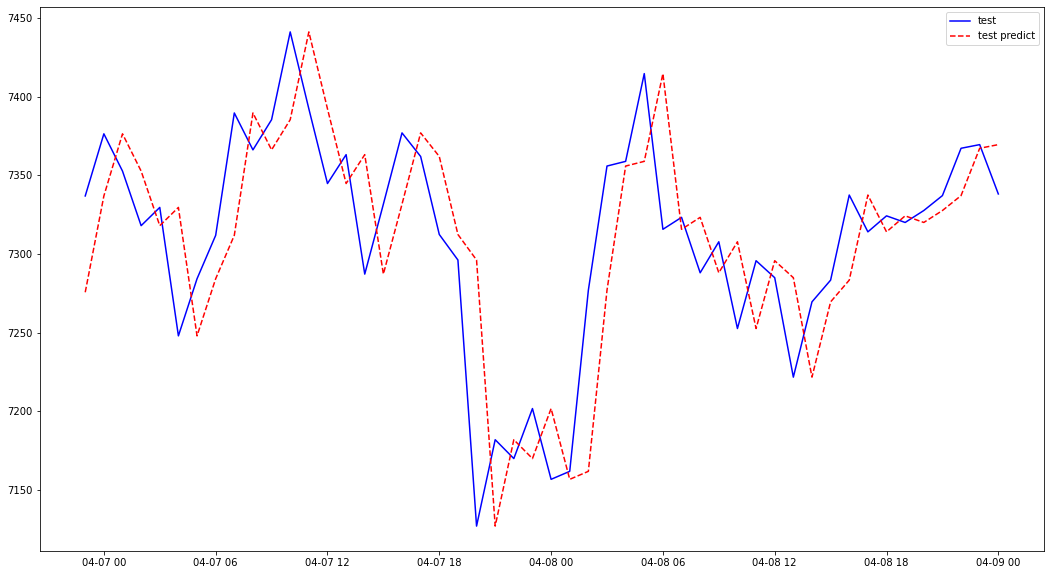

In [25]:
fig, ax = plt.subplots(figsize=(18, 10))

# ax.plot(df_train['date_train'], df_train['y_train'], label = 'train', color="blue")
# ax.plot(df_train['date_train'], df_train['y_train_predict'], '--', label = 'train predict', color="red")

ax.plot(df_test['date_test'][-50:], df_test['y_test'][-50:], label = 'test', color="blue")
ax.plot(df_test['date_test'][-50:], df_test['y_test_predict'][-50:], '--', label = 'test predict', color="red")

ax.legend()
plt.show()